In [18]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

In [19]:
# Load dataset
df = pd.read_csv(r"C:\Users\Parth Mahadik\AICTE FINAL PROJECT\adult 3.csv")

In [20]:
df.head(5)

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [21]:
df.tail(5)

age     workclass  fnlwgt   education  educational-num  \
48837   27       Private  257302  Assoc-acdm               12   
48838   40       Private  154374     HS-grad                9   
48839   58       Private  151910     HS-grad                9   
48840   22       Private  201490     HS-grad                9   
48841   52  Self-emp-inc  287927     HS-grad                9   

           marital-status         occupation relationship   race  gender  \
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K

In [22]:
# Clean data
df = df.drop(['fnlwgt', 'educational-num'], axis=1)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df['income'] = df['income'].apply(lambda x: '>50K' if '>50K' in x else '<=50K')

In [23]:
df

age     workclass     education      marital-status         occupation  \
0       25       Private          11th       Never-married  Machine-op-inspct   
1       38       Private       HS-grad  Married-civ-spouse    Farming-fishing   
2       28     Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3       44       Private  Some-college  Married-civ-spouse  Machine-op-inspct   
5       34       Private          10th       Never-married      Other-service   
...    ...           ...           ...                 ...                ...   
48837   27       Private    Assoc-acdm  Married-civ-spouse       Tech-support   
48838   40       Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
48839   58       Private       HS-grad             Widowed       Adm-clerical   
48840   22       Private       HS-grad       Never-married       Adm-clerical   
48841   52  Self-emp-inc       HS-grad  Married-civ-spouse    Exec-managerial   

        relationship   race  gender  capital-gain  capital-loss  \
0          Own-child  Black    Male             0             0   
1            Husband  White    Male             0             0   
2            Husband  White    Male             0             0   
3            Husband  Black    Male          7688             0   
5      Not-in-family  White    Male             0             0   
...              ...    ...     ...           ...           ...   
48837           Wife  White  Female             0             0   
48838        Husband  White    Male             0             0   
48839      Unmarried  White  Female             0             0   
48840      Own-child  White    Male             0             0   
48841           Wife  White  Female         15024             0   

       hours-per-week native-country income  
0                  40  United-States  <=50K  
1                  50  United-States  <=50K  
2                  40  United-States   >50K  
3                  40  United-States   >50K  
5                  30  United-States  <=50K  
...               ...            ...    ...  
48837              38  United-States  <=50K  
48838              40  United-States   >50K  
48839              40  United-States  <=50K  
48840              20  United-States  <=50K  
48841              40  United-States   >50K  

[45222 rows x 13 columns]

In [24]:
# Sample 30% of data with stratified sampling
df_sampled = df.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))

C:\Users\Parth Mahadik\AppData\Local\Temp\ipykernel_6056\2317466886.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))


In [25]:
# Split features and label
X = df_sampled.drop("income", axis=1)
y = df_sampled["income"]

In [26]:
# One-hot encode
X_encoded = pd.get_dummies(X)
feature_names = X_encoded.columns.tolist()


In [27]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
# Define models with class balancing
models = {
    "RandomForest": RandomForestClassifier(n_estimators=50, class_weight='balanced', n_jobs=-1, random_state=42),
    "GradientBoost": GradientBoostingClassifier(n_estimators=50, random_state=42)
}

In [29]:
# Train and evaluate models
best_model = None
best_model_name = ""
best_accuracy = 0
model_scores = {}

for name, model in models.items():
    name = name.strip()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_model = model
        best_model_name = name
        best_accuracy = acc

print(f"\n✅ Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


RandomForest Accuracy: 0.8382
GradientBoost Accuracy: 0.8497

✅ Best Model: GradientBoost with Accuracy: 0.8497


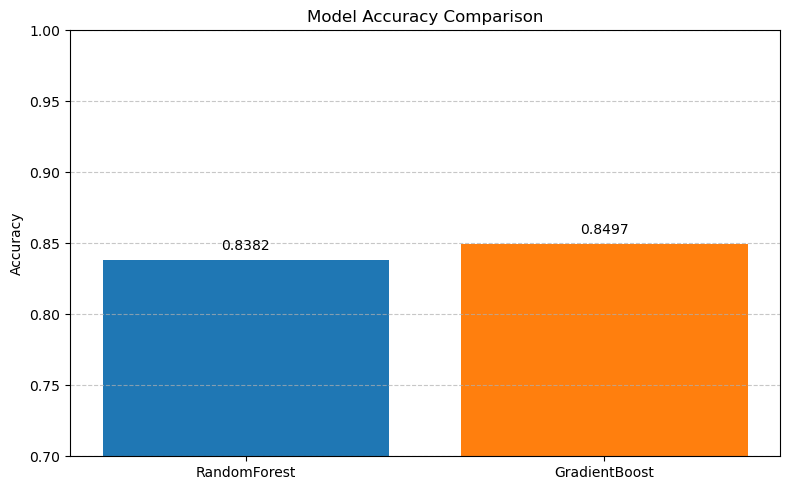

In [30]:
# Plot comparison
import matplotlib.pyplot as plt

model_names = list(model_scores.keys())
accuracies = list(model_scores.values())
best_index = model_names.index(best_model_name)

colors = ['#1f77b4' if i != best_index else '#ff7f0e' for i in range(len(model_names))]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{height:.4f}", ha='center', va='bottom')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
# Save best model and features
joblib.dump((best_model, feature_names), "mymodel.pkl")

['mymodel.pkl']

In [32]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model and training feature columns
model, feature_names = joblib.load("mymodel.pkl")

# Set up the page
st.set_page_config(page_title="Employee Salary Classifier", page_icon="💼", layout="centered")

st.markdown("""
    <style>
        .navbar {
            display: flex;
            justify-content: flex-end;
            background-color: #0e1117;
            padding: 10px 20px;
            border-bottom: 1px solid #30363d;
        }
        .navbar a {
            margin-left: 15px;
            text-decoration: none;
        }
        .navbar img {
            height: 28px;
            vertical-align: middle;
            filter: invert(100%);
        }
    </style>

    <div class="navbar">
        <a href="https://www.linkedin.com/in/parthmahadik08/" target="_blank">
            <img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn">
        </a>
        <a href="https://github.com/ParthMahadik04" target="_blank">
            <img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" alt="GitHub">
        </a>
    </div>
""", unsafe_allow_html=True)


st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Input fields (no sidebar)
age = st.slider("Age", 18, 65, 30)
education = st.selectbox("Education Level", [
    "Bachelors", "Masters", "Doctorate", "HS-grad", "Assoc-acdm", "Assoc-voc", "Some-college", "11th", "10th"
])
occupation = st.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial",
    "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical",
    "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", 
    "Armed-Forces"
])
relationship = st.selectbox("Relationship", ["Husband", "Not-in-family", "Own-child", "Unmarried", "Wife", "Other-relative"])
race = st.selectbox("Race", ["White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"])
gender = st.selectbox("Gender", ["Male", "Female"])
hours_per_week = st.slider("Hours per week", 1, 80, 40)
capital_gain = st.number_input("Capital Gain", 0, 100000, 0)
capital_loss = st.number_input("Capital Loss", 0, 100000, 0)
native_country = st.selectbox("Native Country", ["United-States", "India", "Mexico", "Philippines", "Germany", "Other"])

# Construct DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'workclass': ['Private'],  # Default for prediction
    'education': [education],
    'marital-status': ['Never-married'],  # Default for prediction
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

st.write("### 🔎 Input Data")
st.dataframe(input_df)

def preprocess_input(df, feature_names):
    df_encoded = pd.get_dummies(df)
    df_encoded = df_encoded.reindex(columns=feature_names, fill_value=0)
    return df_encoded

if st.button("🔍 Predict Salary Class"):
    processed_input = preprocess_input(input_df, feature_names)
    prediction = model.predict(processed_input)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    processed_batch = preprocess_input(batch_data, feature_names)
    batch_preds = model.predict(processed_batch)

    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.dataframe(batch_data.head())

    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("⬇️ Download Predictions", csv, file_name='salary_predictions.csv', mime='text/csv')


Overwriting app.py


In [33]:
!streamlit run app.py

^C
